In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("../databases/tratado/consumo residencial por regiao/consumo residencial regiao norte.csv")

In [7]:
df.set_index("data", inplace=True)

<Figure size 1500x800 with 0 Axes>

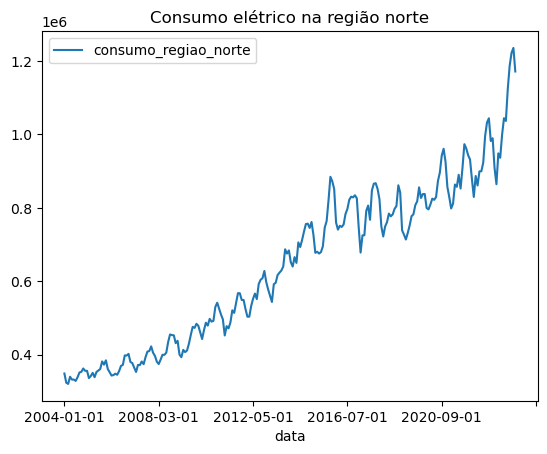

In [12]:
plt.figure(figsize=(15, 8))
df.plot.line()
plt.title("Consumo elétrico na região norte")
plt.legend()
plt.show()

<Figure size 1500x800 with 0 Axes>

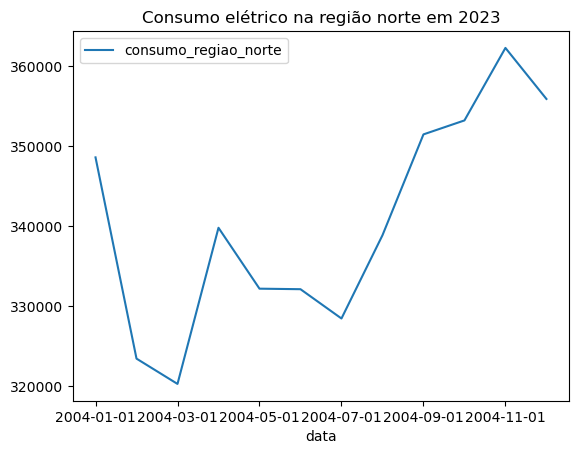

In [27]:
plt.figure(figsize=(15, 8))
df.head(12).plot.line()
plt.title("Consumo elétrico na região norte em 2023")
plt.legend()
plt.show()

<Figure size 1500x800 with 0 Axes>

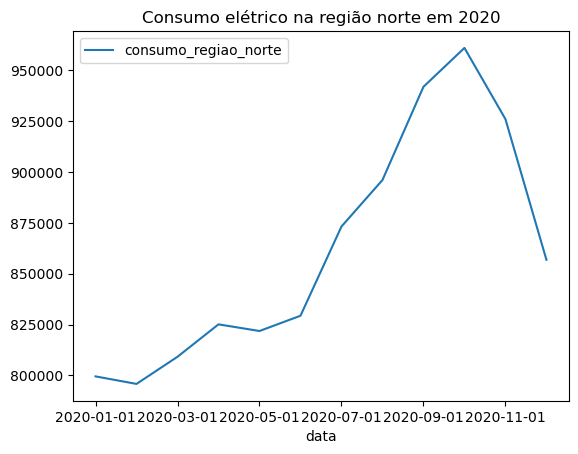

In [44]:
plt.figure(figsize=(15, 8))
df.query("data >= \"2020-01-01\" and data <= \"2020-12-01\"").plot.line()
plt.title("Consumo elétrico na região norte em 2020")
plt.legend()
plt.show()

<Figure size 1500x800 with 0 Axes>

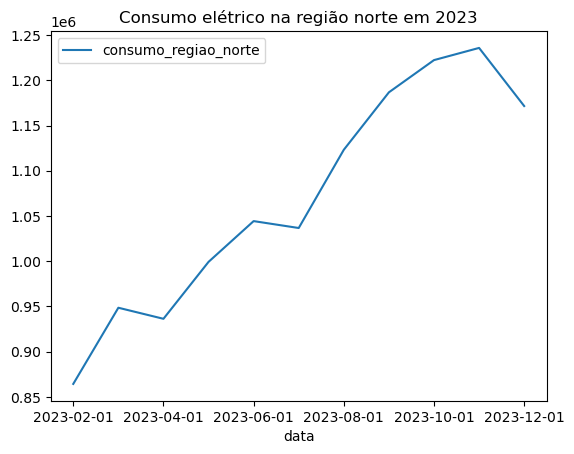

In [26]:
plt.figure(figsize=(15, 8))
df.loc[df.index > "2023-01-01",:].plot.line()
plt.title("Consumo elétrico na região norte em 2023")
plt.legend()
plt.show()


In [45]:
treino_inicio = "2004-01-01"
teste_inicio = "2020-01-01"

In [49]:
treino = df.loc[treino_inicio:teste_inicio]
teste = df.loc[teste_inicio:]

In [51]:
from sklearn.preprocessing import MinMaxScaler

scalador = MinMaxScaler()

treino_escalado = scalador.fit_transform(treino)
teste_escalado = scalador.transform(teste) 

In [53]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:i + time_steps]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 5
X_train, y_train = create_dataset(treino_escalado, treino_escalado, TIME_STEPS)
X_test, y_test = create_dataset(teste_escalado, teste_escalado, TIME_STEPS)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(188, 5, 1) (188, 1)
(43, 5, 1) (43, 1)


In [57]:
X_train

array([[[0.05022537],
        [0.00560934],
        [0.        ],
        [0.03461631],
        [0.02111563]],

       [[0.00560934],
        [0.        ],
        [0.03461631],
        [0.02111563],
        [0.0209987 ]],

       [[0.        ],
        [0.03461631],
        [0.02111563],
        [0.0209987 ],
        [0.01450349]],

       [[0.03461631],
        [0.02111563],
        [0.0209987 ],
        [0.01450349],
        [0.03295264]],

       [[0.02111563],
        [0.0209987 ],
        [0.01450349],
        [0.03295264],
        [0.05531735]],

       [[0.0209987 ],
        [0.01450349],
        [0.03295264],
        [0.05531735],
        [0.05841436]],

       [[0.01450349],
        [0.03295264],
        [0.05531735],
        [0.05841436],
        [0.07448761]],

       [[0.03295264],
        [0.05531735],
        [0.05841436],
        [0.07448761],
        [0.06317503]],

       [[0.05531735],
        [0.05841436],
        [0.07448761],
        [0.06317503],
        [0.06329

In [58]:
treino_escalado 

array([[0.05022537],
       [0.00560934],
       [0.        ],
       [0.03461631],
       [0.02111563],
       [0.0209987 ],
       [0.01450349],
       [0.03295264],
       [0.05531735],
       [0.05841436],
       [0.07448761],
       [0.06317503],
       [0.06329197],
       [0.02816717],
       [0.03807121],
       [0.05338615],
       [0.03267802],
       [0.05754444],
       [0.06453396],
       [0.07192567],
       [0.10863973],
       [0.09305016],
       [0.11396736],
       [0.07213828],
       [0.05642824],
       [0.04033373],
       [0.04283365],
       [0.0494582 ],
       [0.04411817],
       [0.06182674],
       [0.08698371],
       [0.0919818 ],
       [0.13762012],
       [0.13697698],
       [0.14502778],
       [0.10601046],
       [0.10060133],
       [0.07842797],
       [0.05784032],
       [0.09165226],
       [0.09101089],
       [0.10816667],
       [0.09527724],
       [0.12871889],
       [0.15603208],
       [0.15857275],
       [0.18118551],
       [0.150

In [56]:
y_train

array([[0.0209987 ],
       [0.01450349],
       [0.03295264],
       [0.05531735],
       [0.05841436],
       [0.07448761],
       [0.06317503],
       [0.06329197],
       [0.02816717],
       [0.03807121],
       [0.05338615],
       [0.03267802],
       [0.05754444],
       [0.06453396],
       [0.07192567],
       [0.10863973],
       [0.09305016],
       [0.11396736],
       [0.07213828],
       [0.05642824],
       [0.04033373],
       [0.04283365],
       [0.0494582 ],
       [0.04411817],
       [0.06182674],
       [0.08698371],
       [0.0919818 ],
       [0.13762012],
       [0.13697698],
       [0.14502778],
       [0.10601046],
       [0.10060133],
       [0.07842797],
       [0.05784032],
       [0.09165226],
       [0.09101089],
       [0.10816667],
       [0.09527724],
       [0.12871889],
       [0.15603208],
       [0.15857275],
       [0.18118551],
       [0.15067255],
       [0.13480482],
       [0.10741545],
       [0.09600011],
       [0.11736556],
       [0.140

In [54]:
X_train

array([[[0.05022537],
        [0.00560934],
        [0.        ],
        [0.03461631],
        [0.02111563]],

       [[0.00560934],
        [0.        ],
        [0.03461631],
        [0.02111563],
        [0.0209987 ]],

       [[0.        ],
        [0.03461631],
        [0.02111563],
        [0.0209987 ],
        [0.01450349]],

       [[0.03461631],
        [0.02111563],
        [0.0209987 ],
        [0.01450349],
        [0.03295264]],

       [[0.02111563],
        [0.0209987 ],
        [0.01450349],
        [0.03295264],
        [0.05531735]],

       [[0.0209987 ],
        [0.01450349],
        [0.03295264],
        [0.05531735],
        [0.05841436]],

       [[0.01450349],
        [0.03295264],
        [0.05531735],
        [0.05841436],
        [0.07448761]],

       [[0.03295264],
        [0.05531735],
        [0.05841436],
        [0.07448761],
        [0.06317503]],

       [[0.05531735],
        [0.05841436],
        [0.07448761],
        [0.06317503],
        [0.06329

In [60]:
from sklearn.svm import SVR

In [62]:
model = SVR(kernel="rbf", gamma=0.5, C=10, epsilon=0.05)
model.fit(X_train.reshape(X_train.shape[0], -1), y_train.ravel())

SVR(C=10, epsilon=0.05, gamma=0.5)

In [67]:
treino_predict = model.predict(X_train.reshape(X_train.shape[0], -1))
teste_predict = model.predict(X_test.reshape(X_test.shape[0], -1))

treino_predict_inv = scalador.inverse_transform(treino_predict.reshape(-1, 1))
y_train_inv = scalador.inverse_transform(y_train.reshape(-1, 1))
teste_predict_inv = scalador.inverse_transform(teste_predict.reshape(-1, 1))
y_test_inv = scalador.inverse_transform(y_test.reshape(-1, 1))

In [68]:
from sklearn.metrics import mean_squared_error

mean_teste = mean_squared_error(y_test_inv, teste_predict_inv)
mean_treino = mean_squared_error(y_train_inv, treino_predict_inv)

In [73]:
print("MEAN teste: "+str(mean_teste))
print("MEAN treino: "+str(mean_treino))

MEAN teste: 51469465100.876625
MEAN treino: 495731245.8252132


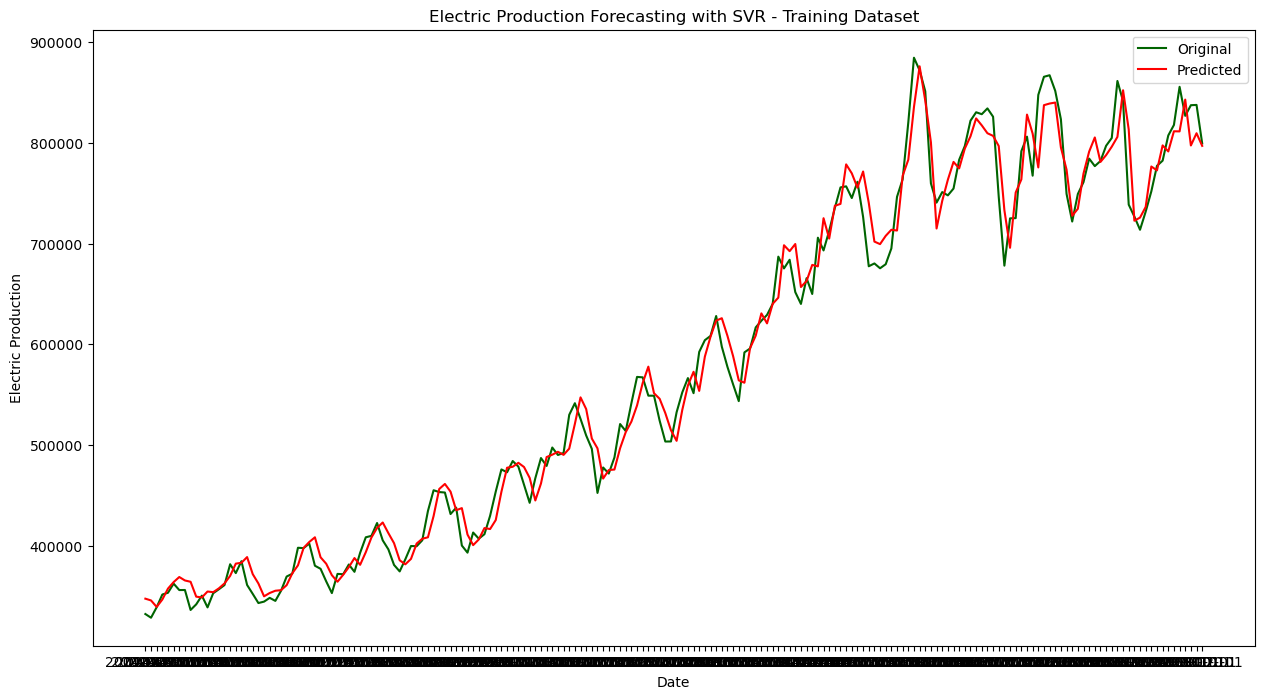

In [71]:
plt.figure(figsize=(15, 8))
plt.plot(df.index[TIME_STEPS:TIME_STEPS+len(treino_predict_inv)], y_train_inv, label='Original', color='darkgreen')
plt.plot(df.index[TIME_STEPS:TIME_STEPS+len(treino_predict_inv)], treino_predict_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Electric Production')
plt.title('Electric Production Forecasting with SVR - Training Dataset')
plt.legend()
plt.show()